### Regression in Machine Learning

In [2]:
import pandas as pd
import numpy as np


# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('darkgrid')
sns.set_palette('husl')

# machine learning libraries (model building and preprocessing)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


### Exploratory data analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Text(0.5, 1.0, 'Distribution of Region')

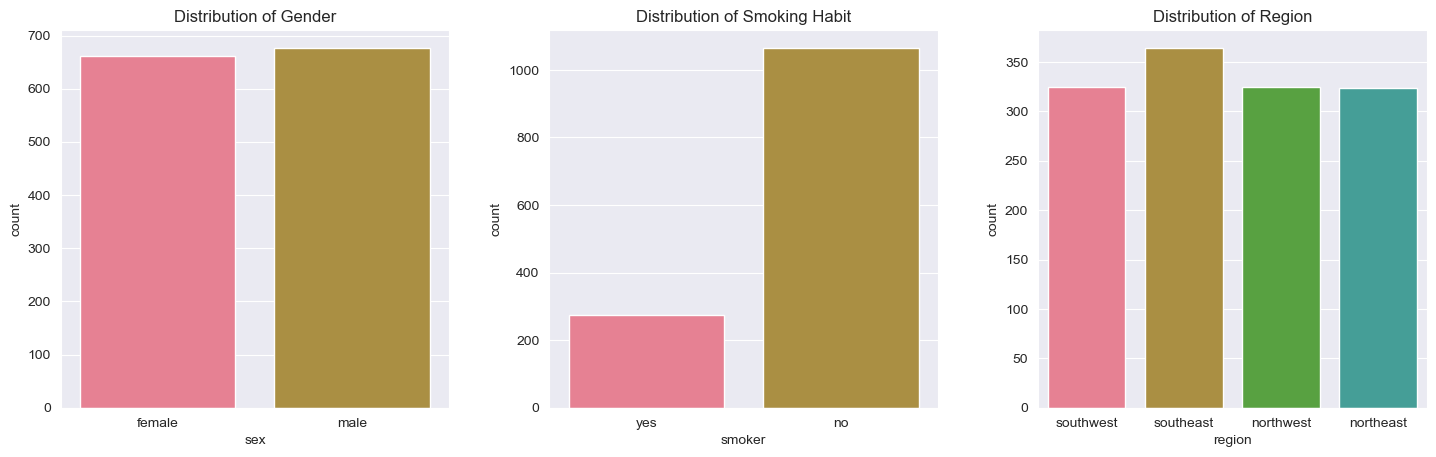

In [6]:
# distribution of the demographic variables


fig, axes = plt.subplots(ncols= 3, figsize = (15,5))

sns.countplot(data=data, x = 'sex', ax= axes[0])
sns.countplot(data=data, x = 'smoker', ax= axes[1])
sns.countplot(data=data, x = 'region', ax= axes[2])

fig.tight_layout(pad = 3)
axes[0].set_title('Distribution of Gender')
axes[1].set_title('Distribution of Smoking Habit')
axes[2].set_title('Distribution of Region')

In [7]:
px.scatter(data_frame=data, x = 'age', y = 'charges',
           title= 'Age vs Charges with respect to Smoking Habit', color= 'smoker')

In [8]:
px.scatter(data_frame=data, x = 'age', y = 'charges',
           title= 'Age vs Charges with respect gender', color= 'sex')

In [9]:
# distribution of charges

px.histogram(data_frame=data, x = 'charges', marginal='box',
             color = 'smoker', color_discrete_sequence=['darkred', 'darkblue'],
             title= 'Distribution of Charges by Smoking habit')

### Feature generation

In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
cat_cols = ['sex', 'smoker','region']

data = pd.get_dummies(data, cat_cols)

In [13]:
data.head(3)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.5523,0,1,1,0,0,0,1,0
2,28,33.00,3,4449.4620,0,1,1,0,0,0,1,0


In [14]:
# split the data

X = data.drop(columns=['charges'])
y = data['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)



In [15]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)
test_prediction = model.predict(X_test)
train_prrediction = model.predict(X_train)

In [16]:
print(f'test rmse: {mean_squared_error(y_true=y_test, y_pred= test_prediction, squared= False)}')
print(f'train rmse: {mean_squared_error(y_true=y_train, y_pred= train_prrediction, squared= False)}')

test rmse: 5641.62655885019
train rmse: 6140.157418880165


In [17]:
scaler = StandardScaler()

cols = ['age', 'bmi','children']

num_cols = scaler.fit_transform(data[cols])

In [18]:
cat_cols = data.drop(columns=['age', 'bmi','children','charges']).values

In [19]:
X_scaled = np.concatenate((num_cols,cat_cols), axis = 1)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, random_state=0)


In [21]:
model2 = reg.fit(x_train, y_train)

scaled_test = model2.predict(x_test)
scaled_train = model2.predict(x_train)

In [22]:
print(f'test rmse: {mean_squared_error(y_true=y_test, y_pred= scaled_test, squared= False)}')
print(f'train rmse: {mean_squared_error(y_true=y_train, y_pred= scaled_train, squared= False)}')

test rmse: 5641.62655885019
train rmse: 6140.157418880165


### Usin the model for Prediction

In [23]:
# prediction

def predict_charges():
    pred_list = []
    while True:
        age = int(input('Enter age: '))
        bmi = float(input('Enter bmi: '))
        sex = input('Enter sex: ')
        children = int(input('Enter children: '))
        smoker = input('Smoke?: ')
        region = input('Enter region: ')
        
        pred_list = [age,bmi,sex,children,smoker,region]
        
        if len(pred_list) == 6:
            break
    dummy = {
        'age':[0,0,0,0,age],
        'bmi':[0,0,0,0,bmi],
        'children':[0,0,0,0,children],
        'sex':['male','female','male','female',sex],
        'smoker':['yes','no','yes','yes',smoker],
        'region':['northeast','northwest','southwest','southeast',region]

    }

    predict_df = pd.DataFrame(data= dummy)
    predict_enc = pd.get_dummies(predict_df,['sex', 'smoker','region'])
    prediction = model.predict(predict_enc.iloc[[4]].values)
    return f'Your insurance charges is N{prediction[0]}'


In [24]:
predict_charges()

'Your insurance charges is N159853.90725426804'

In [25]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

In [26]:
decision_reg = DecisionTreeRegressor(random_state=42,max_depth=5 )

decision_model = decision_reg.fit(X_train, y_train)

train_pred = decision_model.predict(X_train)
test_pred = decision_model.predict(X_test)

In [27]:
print(f"test rmse: {mean_squared_error(y_test, test_pred, squared=False)}")
print(f"train rmse: {mean_squared_error(y_train, train_pred, squared=False)}")

test rmse: 5004.139260660397
train rmse: 4264.029416244485


In [28]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
def train_model(X_train, y_train,y_test,X_test, **params):
    regression_rf = RandomForestRegressor(random_state=0, **params)
    model_rf = regression_rf.fit(X_train, y_train)
    test_pred = model_rf.predict(X_test)
    train_pred = model_rf.predict(X_train)
    rmse_train = mean_squared_error(y_train, train_pred, squared= False)
    rmse_test = mean_squared_error(y_test, test_pred, squared = False)
    
    return f' f1 score train: {rmse_train}, f1 score test: {rmse_test}'
    


In [32]:
train_model(X_train=X_train, y_train=y_train, 
            y_test=y_test, X_test=X_test, n_estimators =10, max_depth = 5)

' f1 score train: 4137.187024033966, f1 score test: 4092.032870413874'

In [33]:
parameters = {
    5:4,
    4:3,
    3:2,
    2:1 
}

for i,v in parameters.items():
    print(train_model(X_train=X_train, y_train=y_train, 
            y_test=y_test, X_test=X_test, n_estimators = i, max_depth = v))

 f1 score train: 4384.196393229261, f1 score test: 4065.2179963467697
 f1 score train: 4606.135398439657, f1 score test: 4171.562645137529
 f1 score train: 5100.56230117669, f1 score test: 4675.054794582675
 f1 score train: 7535.1991792748995, f1 score test: 7227.487214418224
